<a href="https://colab.research.google.com/github/M21EBR/Potato-Disease-Detection/blob/main/Potato_wars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/PlantVillage",
    shuffle=True,
    image_size=(256,256),
    batch_size = 32
)

Found 2152 files belonging to 3 classes.


In [ ]:
class_name  = dataset.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
def gfun(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle = True,shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)

    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)

    train_ds = ds.take(train_size)

    #once u skip u get the rest 20% data
    val_ds  = ds.skip(train_size).take(val_size)#in remaining 20% u will again take val size
    test_ds  = ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds


In [ ]:
train_ds,val_ds,test_ds = gfun(dataset)

prefecth helps in cpu and gpu loading, and by using chache u dont need to read hte same image again

In [ ]:
tarin_ds =train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

this block feature is the model is trained on 255 x 255 but while predicting if image of other dimension is given this will automatically resize it

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [ ]:
resize_and_rescale = tf.keras.Sequential([
     layers.Resizing(256,256),
     layers.Rescaling(1.0/255)
])

till here we were doing preprocessing that is we were resizing , scaling , shuffing and even spliting but from now we will be working on CNN building

In [ ]:
#first layer is resize and rescale
image_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,#this means creating four diffrent sample of the same image by rotating and zomming etc.and training the model on those
    layers.Conv2D(32,(3,3),activation='relu',input_shape = (256,256)),#filter layers, we got 32 by trail and error, ecah layer can detect some features like eyes nose ears etc.. and (3,3)is the size of the filter
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape = (256,256)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape = (256,256)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape = (256,256)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape = (256,256)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu',input_shape = (256,256)),
    layers.MaxPooling2D((2,2)),#this called pooling , here we are using max pooling where we take max of the filter layer result, this is for preserving the feature and reducing the value which can be very help full computuional wise
    #we got this many layer by trail and error
    #now we need to flatten it , so data is array of neuron
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
    #softmax is for normalizing probablity of the class
])
model.build(input_shape=image_shape)

In [ ]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_5 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer = 'adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose=1,
    validation_data = val_ds
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 480s 156ms/step - accuracy: 0.4818 - loss: 0.9185 - val_accuracy: 0.4583 - val_loss: 0.8318
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.5537 - loss: 0.8249 - val_accuracy: 0.7240 - val_loss: 0.6413
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.7634 - loss: 0.6098 - val_accuracy: 0.6927 - val_loss: 0.7432
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 0.8015 - loss: 0.4655 - val_accuracy: 0.8542 - val_loss: 0.3404
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.8671 - loss: 0.3442 - val_accuracy: 0.8125 - val_loss: 0.4749
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 0.8692 - loss: 0.3407 - val_accuracy: 0.9323 - val_loss: 0.2138
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.8905 - loss: 0.2642 - val_accuracy: 0.8385 - val_loss: 0.4093
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.9326 - loss: 0.1889 - val_accuracy: 0.8958 

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

this will show accuracy improved over time

Text(0.5, 1.0, 'training and validation Accuracy')

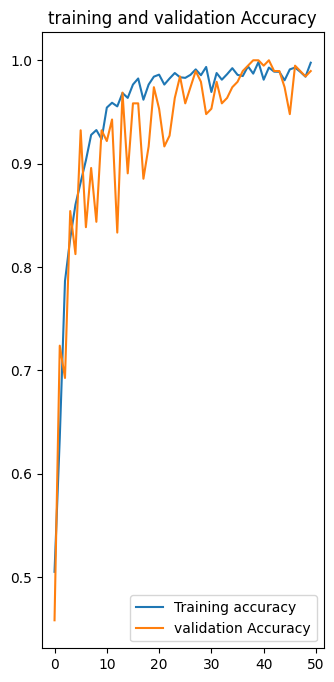

In [ ]:
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label ="Training accuracy")
plt.plot(range(EPOCHS),val_acc,label = 'validation Accuracy')
plt.legend(loc = 'lower right')
plt.title("training and validation Accuracy")

prediction

first image to predict
actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
predicted label: Potato___Late_blight


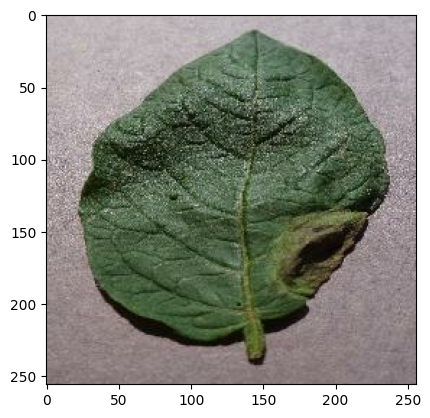

In [ ]:
import numpy as np
for images_batch, label_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_name[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_name[np.argmax(batch_prediction[0])])



downloaded the model using save


In [ ]:
model.save("model.h5", include_optimizer=True)

In [ ]:
from tensorflow.keras.models import load_model

# Load your saved model
model = load_model("model.h5")

# Now you can directly use it for prediction
predictions = model.predict(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
